# 1. Create a plot showing the mean flipper length for each species, with 95% confidence intervals:

<ipython-input-21-7473f373c4d1>:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=penguins, x="species", y="flipper_length_mm", join=False)


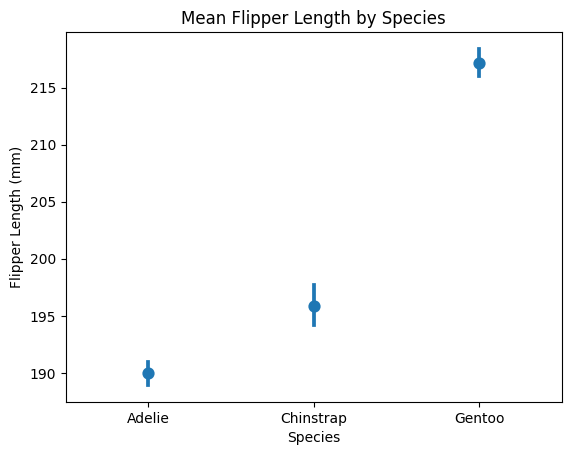

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")
sns.pointplot(data=penguins, x="species", y="flipper_length_mm", join=False)
plt.title("Mean Flipper Length by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

# 1.1 Which species has the highest average flipper length?

In [ ]:
# Calculate average flipper length per species
mean_flippers = penguins.groupby('species')['flipper_length_mm'].mean()
print("Mean flipper length by species:\n", mean_flippers)

# Identify the species with the highest average
max_species = mean_flippers.idxmax()
max_value = mean_flippers.max()
print(f"{max_species} has the highest average flipper length ({max_value:.2f} mm).")


Mean flipper length by species:
 species
Adelie       189.953642
Chinstrap    195.823529
Gentoo       217.186992
Name: flipper_length_mm, dtype: float64
Gentoo has the highest average flipper length (217.19 mm).


# 1.2 Do the confidence intervals for species overlap? What does this suggest about the difference between their true means?

The confidence intervals do not overlap between Gentoo and the other two species. There is a statistically significant difference between Gentoo and the other specie

# 2. Modify your plot to show mean flipper length by both species and sex.
#- Use color coding or grouped bars/points.
#- Show confidence intervals for each subgroup.

<ipython-input-22-9c3e482478fc>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=penguins, x="species", y="flipper_length_mm", hue="sex",
<ipython-input-22-9c3e482478fc>:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=penguins, x="species", y="flipper_length_mm", hue="sex",


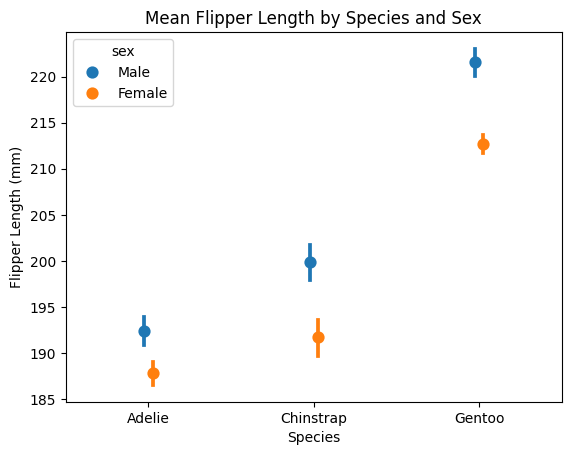

In [ ]:
sns.pointplot(data=penguins, x="species", y="flipper_length_mm", hue="sex",
              dodge=True, ci=95, join= False)
plt.title("Mean Flipper Length by Species and Sex")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

# 2.1: For which species is the difference between male and female flipper lengths most noticeable?

In [ ]:
# Group by species and sex to find mean flipper lengths
group_means = penguins.groupby(['species', 'sex'])['flipper_length_mm'].mean().unstack()
print("Mean flipper length by species and sex:")
print(group_means)

# Calculate absolute difference between male and female
diff = (group_means['Male'] - group_means['Female']).abs()
most_noticeable_species = diff.idxmax()
print(f"{most_noticeable_species} shows the most noticeable difference between sexes ({diff[most_noticeable_species]:.2f} mm).")


Mean flipper length by species and sex:
sex            Female        Male
species                          
Adelie     187.794521  192.410959
Chinstrap  191.735294  199.911765
Gentoo     212.706897  221.540984
Gentoo shows the most noticeable difference between sexes (8.83 mm).


# 2.2: Do any subgroups have non-overlapping confidence intervals? What does this imply about statistical differences?

Yes, for the Gentoo species, male and female confidence intervals do not overlap, suggesting a statistically significant difference in flipper length between sexes.

In contrast, Adelie and Chinstrap have overlapping intervals, so we cannot be confident that the mean flipper lengths differ between sexes.

# 3. What does a narrow confidence interval indicate about the variability or sample size of the data?

A narrow confidence interval indicates:

Low variability in the data (the measurements are consistent), or

A large sample size, which gives a more precise estimate of the mean.

# 4. How would the confidence interval likely change if the sample size were much smaller?

If the sample size were smaller, the confidence interval would get wider.

This means greater uncertainty in the estimated mean.

Statistically, the margin of error increases when you have fewer data points.